In [1]:
# coding: utf-8
import pandas as pd
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/MBAThreeRocks/plataformas-cognitivas-docker/master/database/BaseDefault01.csv")
df.columns = ['nome','renda','idade','etnia','sexo','casapropria','outrasrendas','estadocivil','escolaridade','default']
df.head()


,nome,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
0,"Simon, Rodriguez",4472.190323,42.036031,0,0,1,0,0,3,0
1,"Daniel, Castro",4592.774312,48.230662,1,0,1,0,1,2,0
2,"Myhue, Lin",2486.538807,56.881709,0,1,0,0,0,0,1
3,"Destiny, Richardson-Pacheco",2852.340117,51.684021,1,1,0,0,0,2,1
4,"Brittany, Cohen-Wilson",4703.782812,50.729078,1,1,1,0,1,2,0


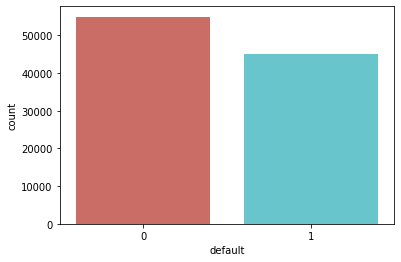

In [4]:

sb.countplot(x='default',data=df, palette='hls')


In [5]:
df.isnull().sum()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nome          100000 non-null  object 
 1   renda         100000 non-null  float64
 2   idade         100000 non-null  float64
 3   etnia         100000 non-null  int64  
 4   sexo          100000 non-null  int64  
 5   casapropria   100000 non-null  int64  
 6   outrasrendas  100000 non-null  int64  
 7   estadocivil   100000 non-null  int64  
 8   escolaridade  100000 non-null  int64  
 9   default       100000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 7.6+ MB


In [6]:
df_data = df.drop(['nome'], 1)
df_data.head()


,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
0,4472.190323,42.036031,0,0,1,0,0,3,0
1,4592.774312,48.230662,1,0,1,0,1,2,0
2,2486.538807,56.881709,0,1,0,0,0,0,1
3,2852.340117,51.684021,1,1,0,0,0,2,1
4,4703.782812,50.729078,1,1,1,0,1,2,0


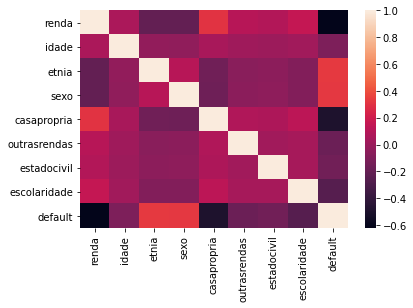

In [7]:

sb.heatmap(df_data.corr())  


In [8]:

# Fare e Pclass não sao independentes uma com a outra, entao vou excluí-las.
base_otimizada = df_data.drop(['etnia'],axis=1)
base_otimizada.head()


,renda,idade,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
0,4472.190323,42.036031,0,1,0,0,3,0
1,4592.774312,48.230662,0,1,0,1,2,0
2,2486.538807,56.881709,1,0,0,0,0,1
3,2852.340117,51.684021,1,0,0,0,2,1
4,4703.782812,50.729078,1,1,0,1,2,0


In [10]:

# # Agora vamos lá!!
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento

X = base_otimizada.iloc[:,[0,1,2,3,4,5,6]].values
y = base_otimizada.iloc[:,7].values

# Agora dividir em treino e teste (teste com 30%)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


#classificador Naive Bayes Gaussiano
classificador = GaussianNB()

classificador.fit(X_train, y_train)

#Em caso de datasets muitos grandes é possível utilizar a função partial_fit
#classificador.partial_fit(X_train, y_train)
 
y_pred = classificador.predict(X_test)


In [11]:

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     16504
           1       0.85      0.83      0.84     13496

    accuracy                           0.86     30000
   macro avg       0.86      0.85      0.86     30000
weighted avg       0.86      0.86      0.86     30000

0.8568333333333333


[[14474  2030]
 [ 2265 11231]]


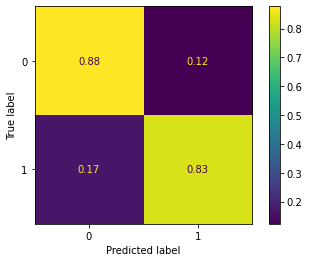

In [12]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(classificador, X_test, y_test, normalize = 'true')

In [13]:
from joblib import dump, load
dump(classificador, 'modelo01.joblib') 

['modelo01.joblib']